# Spatial Filtering
In spatial filtering, the value of a pixel is replaced by a function of the value of the pixel and its neighbours.
Spatial filters can be linear or non-linear.

## Linear Spatial Filtering
Here, we compute the sum-of-product between a kernel $w$ and the image. The kernel size dictates the neighborhood considered. For a kernel of size $m\times n$, both $m$ and $n$ are assumed odd with $m=2a + 1$ and $n=2b+1$. For an $M\times N$ image with an $m\times n$ kernel we obtain the filtered image $g(x,y)$ as

\begin{equation}
g(x,y) = \sum_{s=-a}^a\sum_{t=-b}^b w(s,t)f(x+s,y+t)
\end{equation}

This is also known as spatial correlation

## Spatial Correlation and Convolution
In spatial convolution, the correlation kernel is rotated by $180^{\circ}$. This yields

\begin{equation}
g(x,y) = \sum_{s=-a}^a\sum_{t=-b}^b w(s,t)f(x-s,y-t)
\end{equation}

### Example
In 1D, the correlation equation becomes
\begin{equation}
g(x) = \sum_{s=-a}^a w(s)f(x+s)
\end{equation}
Correlation with the discrete unit impulse rotates the image by $180^{\circ}$.

### Zero padding
For a kernel of size $m\times n$, we pad the image with a minumum of $(m-1)/2$ rows of $0's$ at the top and bottom and $(n-1)/2$ columns of $0's$  on the left and right.


## Smoothing (lowpass) Filters
These kernels blurr the image and reduce sharp transitions.

### Box Filters
These kernels have the same value for all elements. For example a $3\times 3$ box kernel is

$
w(s,t) = \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$

### Gaussian Kernel
For the Gaussian kernel

$w(s,t)=Ke^{-\frac{s^2+t^2}{2\sigma^2}}$


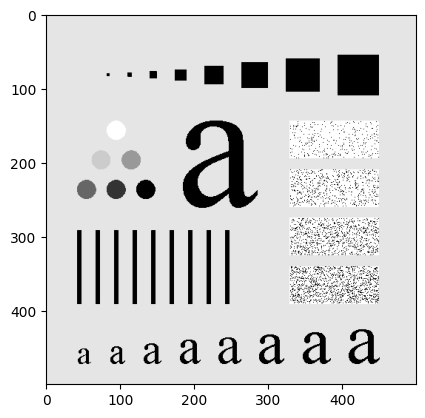

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread("img/test-pattern.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

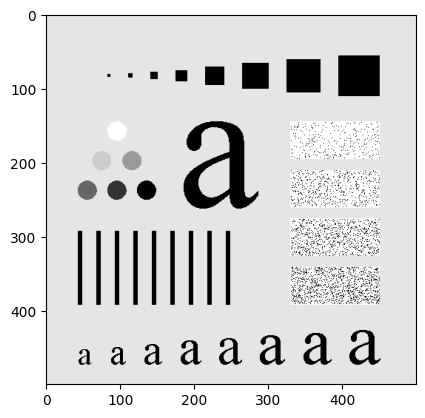

In [2]:
# Apply identity kernel
m = 5
kernel = np.zeros((m, m))
kernel[1,1]  = 1
 
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

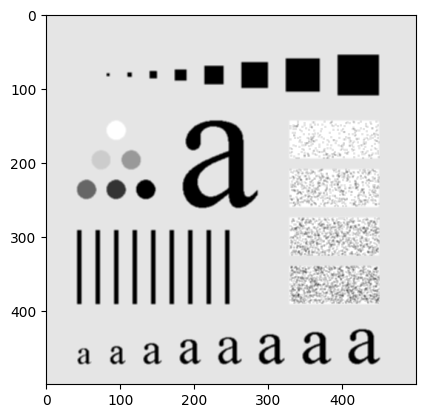

In [3]:
# Apply box kernel
m = 3
kernel = np.ones((m, m)) / (m * m)
 
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

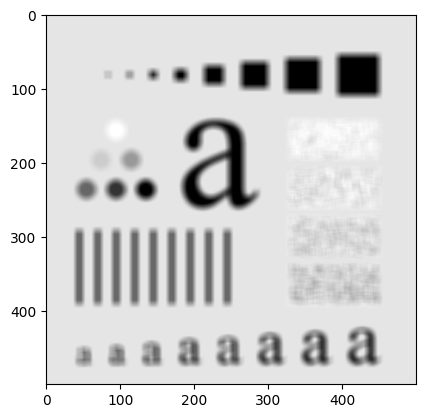

In [4]:
# Apply box kernel
m = 11
kernel = np.ones((m, m)) / (m * m)
 
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

The kernels above are normalised. Failure to normalise would introduce bias in the pixel intensity.

### Gaussian Kernel
Let $K=\sigma=1$

$w(s,t)=e^{-\frac{s^2+t^2}{2}}$. If $m=n=3$ we determine the distance from each pixel to the centre of the kernel.

In [5]:
m = 3
dist = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        dist[i,j] = np.sqrt((i - m // 2) ** 2 + (j - m // 2) ** 2)

In [6]:
dist

array([[1.41421356, 1.        , 1.41421356],
       [1.        , 0.        , 1.        ],
       [1.41421356, 1.        , 1.41421356]])

In [7]:
# Compute Gaussian kernel
kernel = np.exp(-dist ** 2 / 2)

kernel /= np.sum(kernel)
kernel

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [8]:
# with opencv
gaussian_kernel = cv2.getGaussianKernel(m, 1)

gaussian_kernel

array([[0.27406862],
       [0.45186276],
       [0.27406862]])

In [9]:
gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel)
gaussian_kernel_2d

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

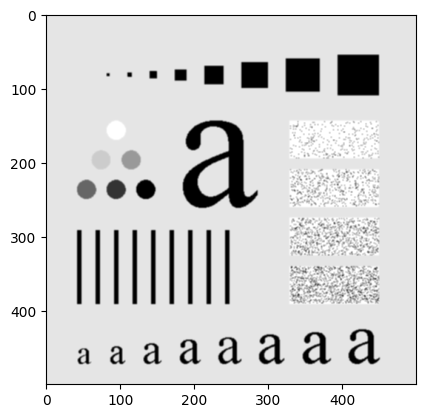

In [10]:
# Apply Gaussian kernel

image = img.imread("img/test-pattern.tif")
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray', vmin=0, vmax=255)
plt.show()

## Highpass (sharpening) filters
These filters magnify transitions and are implemented using derivatives. In discrete sigals, we implement derivatives as finite diferences.

We have

\begin{equation}
\frac{\partial f}{\partial x} = f(x+1) - f(x)
\end{equation}

\begin{equation}
\frac{\partial^2 f}{\partial x^2} = f(x+1) + f(x-1) - 2f(x)
\end{equation}

For a function of several variables, we use the Laplacian operator

\begin{equation}
\nabla^2f=\frac{\partial^2 f}{\partial x^2}+\frac{\partial^2 f}{\partial y^2}
\end{equation}

For the image we get

\begin{equation}
\nabla^2f(x,y)=f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4f(x,y)
\end{equation}

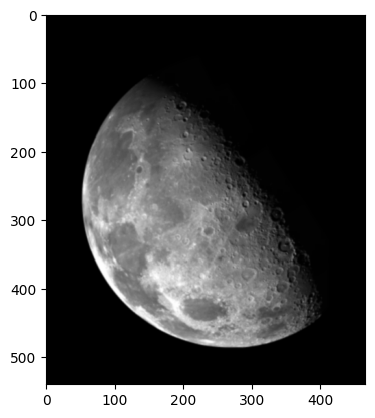

In [11]:
# example
image = img.imread("img/blurry-moon.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

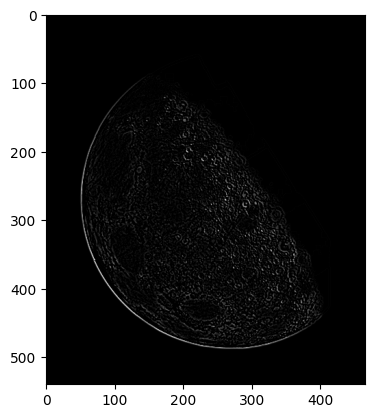

In [12]:
# Apply Laplacian kernel
m = 3
kernel = np.zeros((m, m))
kernel[1,1] = -4
kernel[0,1] = 1
kernel[1,0] = 1
kernel[1,2] = 1
kernel[2,1] = 1
 
filtered = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.imshow(filtered, cmap='gray')
plt.show()

We can use the Laplacian to generate a sharpened image

\begin{equation}
g(x,y) = f(x,y) + c[\nabla^2f(x,y)]
\end{equation}

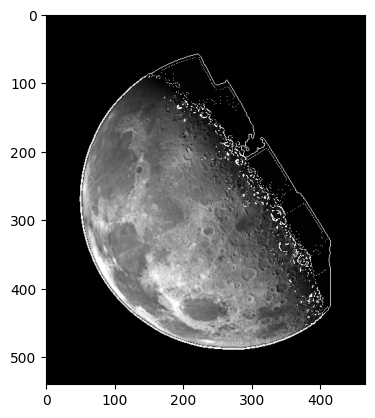

In [13]:
# sharpened image
c = -1
plt.imshow(image - filtered, cmap='gray')
plt.show()